In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

In [2]:
# Generate a dataframe
df = pd.DataFrame(np.random.randn(10, 5), columns=['X1', 'X2', 'X3', 'X4', 'y'])

In [3]:
# transform predictor to binary. This is not efficient
for i in range(0, len(df['y'])):
    if df.ix[i, 4] > 0.0:
        df.ix[i,4] = 1
    else:
        df.ix[i,4] = 0

In [4]:
df.head()

,X1,X2,X3,X4,y
0,0.297255,1.141188,0.470979,1.550472,1.0
1,-0.574597,-0.722837,-0.359823,0.436401,0.0
2,0.762967,0.432245,0.373065,0.306517,1.0
3,0.639009,0.643137,-0.319340,0.711264,0.0
4,0.280654,-1.657717,-0.815747,-0.472633,1.0


In [5]:
# I use () because of python3, print without them in python2.
features = df.ix[:,0:4]
print("Feature columns \n", features)
target = df.ix[:,4]
print("Target column \n",target)

Feature columns 
          X1        X2        X3        X4
0  0.297255  1.141188  0.470979  1.550472
1 -0.574597 -0.722837 -0.359823  0.436401
2  0.762967  0.432245  0.373065  0.306517
3  0.639009  0.643137 -0.319340  0.711264
4  0.280654 -1.657717 -0.815747 -0.472633
5  0.165358  1.214261 -0.017239  0.209484
6 -0.888134  0.217141  1.579015 -0.102677
7  0.159621  0.322033 -0.244453  0.808211
8 -0.481122  0.285399  0.680941 -0.506620
9  0.123199 -0.496643  0.809115  0.327448
Target column 
 0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: y, dtype: float64


In the dataset above, **features** represents your predictors and **target** the label of the data. **train_test_split** will split your dataset in 2 parts, training and testing subsets:

1. X_train, y_train will be used for the machine learning models and their accuracy will be examined with Cross Validation.
2. X_test and y_test will be the "unseen" data that you will test your model on.

**Parameters:**

1. test_size: The percentage of features that will be on your test set
2. random_state: Choose a number. If someone else wants to reproduce the results, he/she has to use the same number.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [7]:
# Same as above, I use () because of python3, print without them in python2.
print(X_train, y_train)
print("----------")
print(X_test, y_test)

         X1        X2        X3        X4
7  0.159621  0.322033 -0.244453  0.808211
2  0.762967  0.432245  0.373065  0.306517
9  0.123199 -0.496643  0.809115  0.327448
4  0.280654 -1.657717 -0.815747 -0.472633
3  0.639009  0.643137 -0.319340  0.711264
6 -0.888134  0.217141  1.579015 -0.102677 7    0.0
2    1.0
9    0.0
4    1.0
3    0.0
6    0.0
Name: y, dtype: float64
----------
         X1        X2        X3        X4
8 -0.481122  0.285399  0.680941 -0.506620
1 -0.574597 -0.722837 -0.359823  0.436401
5  0.165358  1.214261 -0.017239  0.209484
0  0.297255  1.141188  0.470979  1.550472 8    0.0
1    0.0
5    1.0
0    1.0
Name: y, dtype: float64


### Grid search with Random Forests

With Grid search, we basically select a specific model (RF) and create a set with some parameters (depth of each tree, number of estimators, etc) for which we manually select some values. The **grid search will try each different combination** of these parameters, then it will **cross validate** the model and measure **how good** it is with these different sets using a specific estimator (you can choose this estimator through scoring)

You can find more information here: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV

In [8]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [9]:
n_estimators = [10,20,50,100,200] # DON'T USE MANY TREES, IT WILL TAKE A LOT TO TRAIN. TRY WITH LESS FIRST, THEN ADD MORE

# This is the set of parameters that we will test in the grid search
params = {'n_estimators': n_estimators} 
 
gs = GridSearchCV(
     estimator= RandomForestClassifier(), # the machine learning model we have selected
     cv= 2, #KFold cross validation with just 2 folds (just for educational purposes)
     param_grid=params, # the set of different parameters that the GridSearch will test
     scoring='accuracy', # measuring the fitness of the model
     )

gs.fit(X_train, y_train)
print ('Best estimator')
print (gs.best_score_)
print (gs.best_estimator_)
print ('All estimators', gs.grid_scores_)

Best estimator
0.666666666667
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
All estimators [mean: 0.50000, std: 0.16667, params: {'n_estimators': 10}, mean: 0.66667, std: 0.00000, params: {'n_estimators': 20}, mean: 0.66667, std: 0.00000, params: {'n_estimators': 50}, mean: 0.66667, std: 0.00000, params: {'n_estimators': 100}, mean: 0.66667, std: 0.00000, params: {'n_estimators': 200}]


In [10]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[[2 0]
 [2 0]]


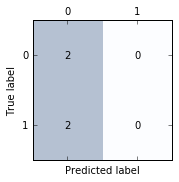

In [11]:
from sklearn.metrics import confusion_matrix

#Confusion matrix for RF with grid search
y_prediction = gs.predict(X_test) # Now we are using the test set which was not used in training in order to make the predictions
confusion_mat = confusion_matrix(y_true = y_test, y_pred = y_prediction)
print(confusion_mat)
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confusion_mat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(x=j, y = i, s = confusion_mat[i, j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()